In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./titanic.csv')

In [6]:
df.describe()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,31.336156,0.466742,0.331454,10517.085578
std,0.487004,28.162654,1.130717,0.830127,81274.234057
min,0.000000,-56.000000,-8.000000,-5.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,38.000000,1.000000,0.000000,31.387500
max,1.000000,240.000000,8.000000,6.000000,800069.550000


Looking for Null values in the dataset

In [7]:
df.isnull().sum()

Survived                    0
Pclass                      0
Name                        0
Sex                        13
Age                         0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        0
dtype: int64

Data Cleaning Decisions:

The ages in the data set follow the range from -56 to 240 which shows some errors in the dataset so only the ages from 0 to 100 are considered during analysis.

There are 13 null values in the Sex column and since there is no sure way to guess which Sex the passenger is, those 13 rows have been ommitted from analysis.

Since there are only 13 rows with null values and there's no reasonable way to classify the gender for these rows, we can discount them for the analysis.

In [8]:
df1 = df.dropna()
df1.describe()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.384439,31.373192,0.466819,0.332952,10100.990512
std,0.486741,28.337683,1.136471,0.833238,80173.081798
min,0.000000,-56.000000,-8.000000,-5.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,38.000000,1.000000,0.000000,31.387500
max,1.000000,240.000000,8.000000,6.000000,800069.550000


Checking the survival rate for passengers on board the titanic

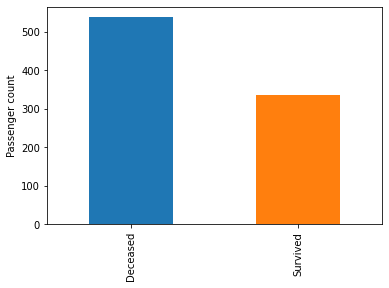

0    538
1    336
Name: Survived, dtype: int64


In [37]:
survivedDead = df1['Survived'].value_counts().plot(kind='bar')
survivedDead.set_xticklabels(['Deceased', 'Survived'])
survivedDead.set(ylabel = 'Passenger count')
plt.show()

genSurvivalRate = df1['Survived'].value_counts()
print(genSurvivalRate)

# Here 0 represents deceased and 1 represents survived.

From the initial bar chart, we can see that there's only a 38% survival rate on board the titanic. 

Comparison of survival rate based on sex

Male survival rate

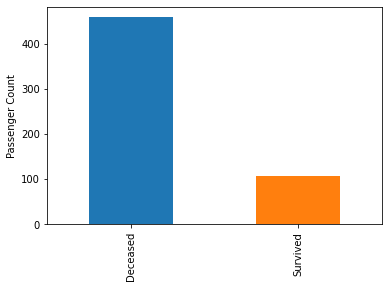

In [10]:
# Can now make checks to see the number of men and women who survived and their percentage survival rate
maleSurvDead = df1[df1['Sex']=='male']['Survived'].value_counts().plot(kind='bar')
maleSurvDead.set_xticklabels(['Deceased', 'Survived'])
maleSurvDead.set(ylabel = 'Passenger Count')
plt.show()

In [11]:
# Showing the survival rate of men on the titanic
df1[df1['Sex']=='male']['Survived'].value_counts() / df1[df1['Sex']=='male']['Survived'].value_counts().sum()


0    0.810619
1    0.189381
Name: Survived, dtype: float64

When comparing the survival rate for men on the titanic, men only had an 18.9% chance of survival.

Female survival rate

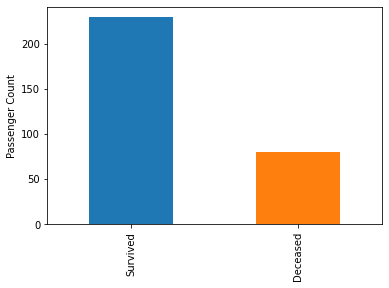

In [38]:
femaleSurvDead = df1[df1['Sex']=='female']['Survived'].value_counts().plot(kind='bar')
femaleSurvDead.set_xticklabels(['Survived', 'Deceased'])
femaleSurvDead.set(ylabel = 'Passenger Count')
plt.show()

In [13]:
# Showing the survival rate of women on the titanic
df1[df1['Sex']=='female']['Survived'].value_counts() / df1[df1['Sex']=='female']['Survived'].value_counts().sum()

1    0.7411
0    0.2589
Name: Survived, dtype: float64

In comparison to the male survival rate of 18.9%, women travelling on the Titanic had a 74% chance of survival.

Correlation between men and women and their survival rate

In [14]:
# Correlation between men and women and their survival rate
df1['Sex'].str.get_dummies().corrwith(df1['Survived']/df1['Survived'].max())

female    0.542202
male     -0.542202
dtype: float64

Correlation between sex and survival rate show a positive correlation for women and survival (meaning that females were more likely to survive) compared to males.

Cleaning the passenger class column to group classes into 3 values (Passenger class 1, 2 and 3)

In [15]:
# Fix the pc class since there are many different representations for each passenger class. We can combine them into 3 different categories, class 1, 2 and 3
#df1['Pclass'].value_counts()

df1['Pclass'].replace(to_replace = '3 pclass',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '2 pclass',value = '2', inplace= True)
df1['Pclass'].replace(to_replace = '1 pclass',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '3-pclass',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '2-pclass',value = '2', inplace= True)
df1['Pclass'].replace(to_replace = '1-pclass',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '3-pclas',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '3-pcla',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '3 pclas',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '3-pcl',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '3 pcla',value = '3', inplace= True)
df1['Pclass'].replace(to_replace = '1-pclas',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '2 pclas',value = '2', inplace= True)
df1['Pclass'].replace(to_replace = '1-pcla',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '1 pcla',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '2-pcla',value = '2', inplace= True)
df1['Pclass'].replace(to_replace = '2 pcla',value = '2', inplace= True)
df1['Pclass'].replace(to_replace = '1 pclas',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '2-pclas',value = '2', inplace= True)
df1['Pclass'].replace(to_replace = '1-pcl',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '1 pcl',value = '1', inplace= True)
df1['Pclass'].replace(to_replace = '3 pcl',value = '3', inplace= True)


df1['Pclass'].value_counts()


c:\Users\nzs52\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


3    479
1    213
2    182
Name: Pclass, dtype: int64

In [16]:
round(df1[['Pclass','Survived']].groupby(['Pclass']).mean()*100,1)

,Survived
Pclass,
1,62.9
2,47.3
3,24.2


From looking at the survival rate for passengers based on their passenger class we can see that survival chances reduce as the passengers travel in lower classes.

In [39]:
# Showing the correlation between the passenger class and likelihood of survival
df1['Pclass'].str.get_dummies().corrwith(df1['Survived']/df1['Survived'].max())

1    0.285508
2    0.092865
3   -0.322053
dtype: float64

Correlation between passenger class and survival show a positive correlation for survival for passengers travelling on the first class and a negative correlation for passengers travelling on the third class.

In [17]:
round(df1[['Sex','Pclass','Survived']].groupby(['Pclass', 'Sex']).mean()*100,1)

Survived
Pclass Sex             
1      female      97.8
       male        36.9
2      female      92.0
       male        15.9
3      female      49.7
       male        13.4

Survival chart and rates for first class passengers 

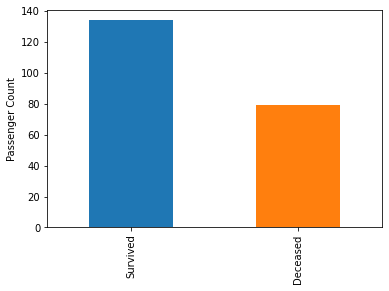

In [40]:
# Showing the survival bar chart for passengers in first class

first = df1[df1['Pclass']=='1']['Survived'].value_counts().plot(kind='bar')
first.set_xticklabels(['Survived', 'Deceased'])
first.set(ylabel = 'Passenger Count')
plt.show()

In [19]:
# Showing the survival rate percentages for first class
df1[df1['Pclass']=='1']['Survived'].value_counts() / df1[df1['Pclass']=='1']['Survived'].value_counts().sum()

1    0.629108
0    0.370892
Name: Survived, dtype: float64

Passengers were more likely to survive than not if they were travelling on first class. 

Survival rate of men who travelled first class

In [20]:
# Showing the relationship between men and the survival rate based on the first passenger class
df1[(df1['Pclass']=='1') & (df1['Sex']=='male')]['Survived'].value_counts() / df1[(df1['Pclass']=='1') & (df1['Sex']=='male')]['Survived'].value_counts().sum()

0    0.631148
1    0.368852
Name: Survived, dtype: float64

Even though passengers were more likely to survive if they travelled first class, males travelling on first class only had a 36.9% chance of survival

Survival rate of women who travelled first class

In [21]:
# Showing the relationship between women and the survival rate based on the first passenger class
df1[(df1['Pclass']=='1') & (df1['Sex']=='female')]['Survived'].value_counts() / df1[(df1['Pclass']=='1') & (df1['Sex']=='female')]['Survived'].value_counts().sum()

1    0.978022
0    0.021978
Name: Survived, dtype: float64

Whereas, women travelling on first class were almost guaranteed survival with a 97.8% survival rate.

Survival rates and chart of passengers who travelled in the second class

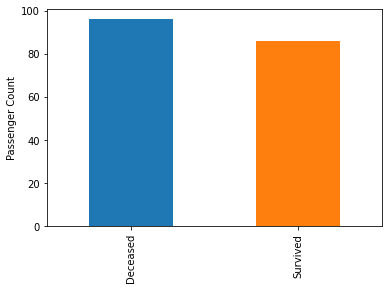

In [22]:
# Showing the survival bar chart for passengers in the second passenger class

second = df1[df1['Pclass']=='2']['Survived'].value_counts().plot(kind='bar')
second.set_xticklabels(['Deceased', 'Survived'])
second.set(ylabel = 'Passenger Count')
plt.show()

In [23]:
# Showing the survival rate percentages for second passenger class
df1[df1['Pclass']=='2']['Survived'].value_counts() / df1[df1['Pclass']=='2']['Survived'].value_counts().sum()

0    0.527473
1    0.472527
Name: Survived, dtype: float64

Male survival rate who travelled in the second passenger class

In [24]:
# Showing the relationship between men and the survival rate based on the second passenger class
df1[(df1['Pclass']=='2') & (df1['Sex']=='male')]['Survived'].value_counts() / df1[(df1['Pclass']=='2') & (df1['Sex']=='male')]['Survived'].value_counts().sum()

0    0.841121
1    0.158879
Name: Survived, dtype: float64

Compared to first class, men were half as likely to survive if they travelled second class as compared to travelling in first class.

Female survival rate who travelled in the second passenger class

In [25]:
# Showing the relationship between women and the survival rate based on the second passenger class
df1[(df1['Pclass']=='2') & (df1['Sex']=='female')]['Survived'].value_counts() / df1[(df1['Pclass']=='2') & (df1['Sex']=='female')]['Survived'].value_counts().sum()

1    0.92
0    0.08
Name: Survived, dtype: float64

Survival chart and rates of passnengers who travelled in the third class of the titanic

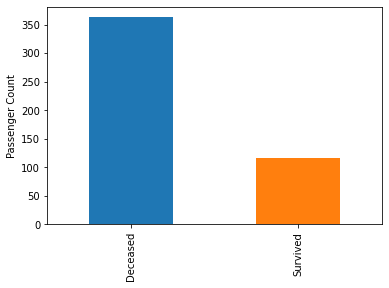

In [26]:
# Showing the survival rate for the passengers in the third passenger class

third = df1[df1['Pclass']=='3']['Survived'].value_counts().plot(kind='bar')
third.set_xticklabels(['Deceased', 'Survived'])
third.set(ylabel = 'Passenger Count')
plt.show()

In [27]:
# Showing the survival rate percentages for the third passenger class
df1[df1['Pclass']=='3']['Survived'].value_counts() / df1[df1['Pclass']=='3']['Survived'].value_counts().sum()

0    0.757829
1    0.242171
Name: Survived, dtype: float64

Male survival rate on the third passenger class

In [28]:
# Showing the relationship between men and the survival rate based on the third passenger class
df1[(df1['Pclass']=='3') & (df1['Sex']=='male')]['Survived'].value_counts() / df1[(df1['Pclass']=='3') & (df1['Sex']=='male')]['Survived'].value_counts().sum()

0    0.866071
1    0.133929
Name: Survived, dtype: float64

Female survival rate on the third passenger class

In [29]:
# Showing the relationship between women and the survival rate based on the third passenger class
df1[(df1['Pclass']=='3') & (df1['Sex']=='female')]['Survived'].value_counts() / df1[(df1['Pclass']=='3') & (df1['Sex']=='female')]['Survived'].value_counts().sum()

0    0.503497
1    0.496503
Name: Survived, dtype: float64

After analysing the passenger class and sex and their impact on survival we can see that males had the best chance of survival when travelling first class (36.9%) but for females, travelling in first class or second class had a survival rate of over 90%.

Age

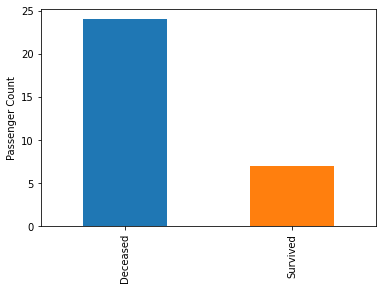

Over age 60 survival rate:
0    0.774194
1    0.225806
Name: Survived, dtype: float64


In [30]:
overSixty = df1[(df1['Age']>59)&(df1['Age']<101)]['Survived'].value_counts() / df1[(df1['Age']>59)&(df1['Age']<101)]['Survived'].value_counts().sum()

ovSixty = df1[(df1['Age']>59)&(df1['Age']<101)]['Survived'].value_counts().plot(kind='bar')
ovSixty.set_xticklabels(['Deceased', 'Survived'])
ovSixty.set(ylabel = 'Passenger Count')
plt.show()


print('Over age 60 survival rate:')
print(overSixty)



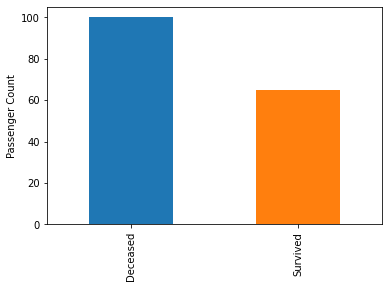

40 to 60 survival rate:
0    0.606061
1    0.393939
Name: Survived, dtype: float64


In [31]:
fourtyToSixty = df1[(df1['Age']>=40)&(df1['Age']<61) ]['Survived'].value_counts() / df1[(df1['Age']>=40)&(df1['Age']<61)]['Survived'].value_counts().sum()

fourtToSixty = df1[(df1['Age']>=40)&(df1['Age']<61) ]['Survived'].value_counts().plot(kind='bar')
fourtToSixty.set_xticklabels(['Deceased', 'Survived'])
fourtToSixty.set(ylabel = 'Passenger Count')
plt.show()

print('40 to 60 survival rate:')
print(fourtyToSixty)

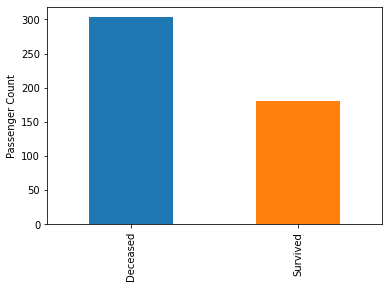

20 to 40 survival rate:
0    0.627329
1    0.372671
Name: Survived, dtype: float64


In [32]:
twentyToFourty = df1[(df1['Age']>=20)&(df1['Age']<41) ]['Survived'].value_counts() / df1[(df1['Age']>=20)&(df1['Age']<41)]['Survived'].value_counts().sum()

twentToFourty = df1[(df1['Age']>=20)&(df1['Age']<41) ]['Survived'].value_counts().plot(kind='bar')
twentToFourty.set_xticklabels(['Deceased', 'Survived'])
twentToFourty.set(ylabel = 'Passenger Count')
plt.show()

print('20 to 40 survival rate:')
print(twentyToFourty)

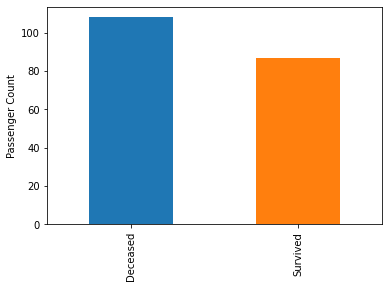

Under twenty survival rate:
0    0.553846
1    0.446154
Name: Survived, dtype: float64


In [33]:
zeroToTwenty = df1[(df1['Age']>0)&(df1['Age']<20) ]['Survived'].value_counts() / df1[(df1['Age']>0)&(df1['Age']<20)]['Survived'].value_counts().sum()

zeroTwenty = df1[(df1['Age']>0)&(df1['Age']<20) ]['Survived'].value_counts().plot(kind='bar')
zeroTwenty.set_xticklabels(['Deceased', 'Survived'])
zeroTwenty.set(ylabel = 'Passenger Count')
plt.show()


print('Under twenty survival rate:')
print(zeroToTwenty)

Age and passenger class and their correlation to survival rate

In [34]:
# Group ages in values of 10
#df1.assign(Agegroup = pd.cut(df1['Age'], bins=[0,11,21,31,41,51,61,71,81,91,101], right=False, labels=['0 to 10','10 to 20','20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 80','80 to 90','90 to 100']))
round(df1[['Age','Pclass','Survived']].groupby(['Pclass', 'Age']).mean()*100,1)

Survived
Pclass Age              
1      -56.00        0.0
       -46.00      100.0
       -39.00        0.0
       -36.00      100.0
       -32.00      100.0
       -2.00         0.0
        0.92       100.0
        4.00       100.0
        11.00      100.0
        14.00      100.0
        15.00      100.0
        16.00      100.0
        17.00      100.0
        18.00       75.0
        19.00       60.0
        21.00       66.7
        22.00       80.0
        23.00      100.0
        24.00       71.4
        25.00      100.0
        26.00      100.0
        27.00       75.0
        28.00       40.0
        29.00       50.0
        30.00       71.4
        31.00       60.0
        32.00      100.0
        33.00       75.0
        34.00      100.0
        35.00      100.0
...                  ...
3       41.00        0.0
        42.00        0.0
        43.00        0.0
        44.00       25.0
        45.00       20.0
        45.50        0.0
        47.00        0.0
        48.00        0.0
        49.00        0.0
        50.00        0.0
        51.00        0.0
        54.00        0.0
        55.00        0.0
        55.50        0.0
        59.00        0.0
        61.00        0.0
        62.00        0.0
        63.00      100.0
        65.00        0.0
        66.00        0.0
        69.00        0.0
        70.50        0.0
        74.00        0.0
        224.00       0.0
        226.00     100.0
        228.00       0.0
        230.50       0.0
        231.00       0.0
        232.00     100.0
        240.00       0.0

[208 rows x 1 columns]

In [35]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cbar = True, cmap = 'Accent')

NameError: name 'sns' is not defined